<a href="https://colab.research.google.com/github/Emekaborisama/Number-of-vote-prediction/blob/main/NumberVotePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [ ]:
df_train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [ ]:
df_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [ ]:
df_train.isnull().values.any()
df_test.isnull().values.any()

False

In [ ]:
df_train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [ ]:
del df_train['Username']
del df_test['Username']


In [ ]:
df_train.corr()

,ID,Reputation,Answers,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,0.498642,0.202033
Views,0.017400,0.036455,0.498642,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,0.437336,1.000000


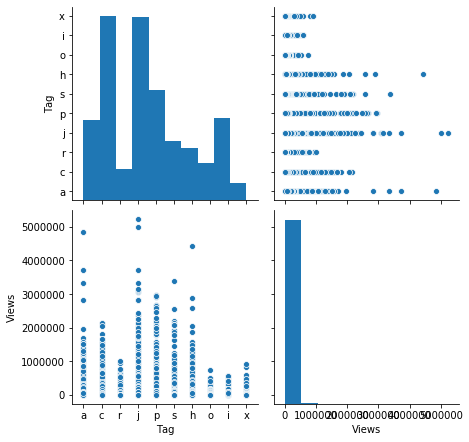

In [ ]:
g = sns.pairplot(df_train, height = 3, 
            vars = ['Tag', 'Views'])

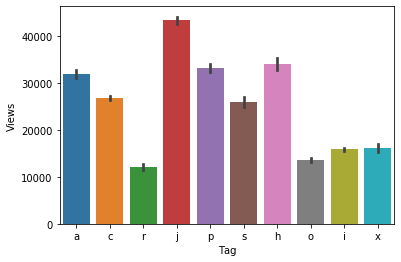

In [ ]:
sns.barplot(x='Tag', y='Views',
           data = df_train)

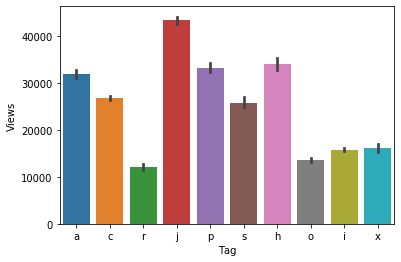

In [ ]:
sns.barplot(df_train.Tag, df_train.Views)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df_train['Tag'] = labelencoder.fit_transform(df_train['Tag'])
df_test['Tag'] = labelencoder.fit_transform(df_test['Tag'])

#df_train['Answers'] = labelencoder.fit_transform(df_train['Answers'])
#df_test['Answers'] = labelencoder.fit_transform(df_test['Answers'])




df_train['Views'] = labelencoder.fit_transform(df_train['Views'])
df_test['Views'] = labelencoder.fit_transform(df_test['Views'])

df_train['Reputation'] = labelencoder.fit_transform(df_train['Reputation'])
df_test['Reputation'] = labelencoder.fit_transform(df_test['Reputation'])

In [ ]:
x_test = df_test.drop(['ID'], axis = 1)

In [ ]:
X = df_train.drop(['Upvotes', 'ID'], axis= 1)
y = df_train.Upvotes

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2
                         )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_t = knn.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
print("KNN model accuracy(in test):", r2_score(y_test, y_pred)*100)
print("KNN model accuracy(in train):", r2_score(y_train, y_pred_t)*100)


KNN model accuracy(in test): 88.28819759543529
KNN model accuracy(in train): 95.27134271898964


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("regr model accuracy(in test):", sqrt(mean_squared_error(y_test, y_pred)*100))
print("regr model accuracy(in train):", sqrt(mean_squared_error(y_train, y_pred_t)*100))


regr model accuracy(in test): 12622.59388352016
regr model accuracy(in train): 7788.3589469706


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train, y_train)

regr model accuracy(in train): 34746.91177723333


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
Ada = AdaBoostRegressor(random_state=43, n_estimators=10)
Ada.fit(X_train, y_train)
y_ada = Ada.predict(X_test)
y_ada_t = Ada.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
print("ada model accuracy(in test):", r2_score(y_test, y_ada))
print("ada model accuracy(in train):", r2_score(y_train, y_ada_t))


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("regr model accuracy(in test):", sqrt(mean_squared_error(y_test, y_ada)*100))
print("regr model accuracy(in train):", sqrt(mean_squared_error(y_train, y_ada_t)*100))


regr model accuracy(in test): 21316.60183717167
regr model accuracy(in train): 16925.570377685333


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
clf = GradientBoostingRegressor(loss='huber',
                                n_estimators=300, max_depth=8,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [ ]:
clf.fit(X_train, y_train)
y_g_t = clf.predict(X_train)
y_g = clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print("gb model accuracy(in test):", r2_score(y_test, y_g))
print("gb model accuracy(in train):", r2_score(y_train, y_g_t))
print(clf.feature_importances_)

gb model accuracy(in test): 0.8466860912838454
gb model accuracy(in train): 0.900517803819845
[0.00222827 0.52928734 0.00334058 0.46514381]


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("regr model accuracy(in test):", sqrt(mean_squared_error(y_test, y_g)*100))
print("regr model accuracy(in train):", sqrt(mean_squared_error(y_train, y_g_t)*100))


regr model accuracy(in test): 18036.088146252037
regr model accuracy(in train): 18697.3432785867


In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
dep = np.arange(1,9)
param_grid = {'max_depth' : dep}

clf = GradientBoostingRegressor(loss='huber',
                                n_estimators=300, max_depth=8,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)
clf_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6}
Best score is 0.829514989858675


In [ ]:
submission = pd.DataFrame({"ID":df_test["ID"],
                           "Upvotes":y_g})
submission.to_csv("submit7b.csv", index=False)

In [ ]:
binarizer_1 = Binarizer(35) 
binarizer_2 = Binarizer(61000) 
  
# Transformed feature 
print ("\nBinarized age : \n", binarizer_1.fit_transform(x)) 
  
print ("\nBinarized salary : \n", binarizer_2.fit_transform(y)) 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer

In [ ]:
binarizer_1 = Binarizer(35)
binarizer_2 = Binarizer(6200)